<h2 style='color:blue' align="center">Decision Tree Classification</h2>


### Presented By- Shivani 
#### M07158025

## What is Classification ?

- Classification is the process of dividing the datasets into different categories or groups by adding label.


#### Types of Classification

1. Decision Tree
2. Random Forest
3. Naïve Bayes
4. KNN

## Decision Tree

- A decision tree is a tree where each node represents a feature(attribute), each link(branch) represents a decision(rule) and each leaf represents an outcome(categorical or continues value).
- Graphical representation of all possible solutions to a decision.
- Decision made can be easily explained.


### Why Decision trees?

- Decision tress often mimic the human level thinking so its so simple to understand the data and make some good interpretations.
- Decision trees actually make you see the logic for the data to interpret.

### Decision Tree Learning Algorithm

There are many specific decision tree algorithms which include :
- ID3 (Iterative Dichotomiser 3) 
- C4.5 (successor of ID3)
- CART (Classification and Regression Trees) 
- CHAID (Chi-squared Automatic Interaction Detector). Performs multi-level splits when computing classification trees. 
- MARS: extends decision trees to handle numerical data better.

## ID3 Algorithm
- ID3 is one of the most common decision tree algorithm
- Dichotomisation means dividing into two completely opposite things
- Algorithm iteratively divides attributes into two groups which are the most dominant attribute and others to construct a tree.

## CART Algorithm
- The CART or Classification & Regression Trees methodology was introduced in 1984 by Leo Breiman, Jerome Friedman, Richard Olshen and Charles Stone as an umbrella term to refer to the following types of decision trees

- Classification Trees: where the target variable is categorical and the tree is used to identify the "class" within which a target variable would likely fall into.

- Regression Trees: where the target variable is continuous and tree is used to predict it's value.

- The main elements of CART (and any decision tree algorithm) are:

1) Rules for splitting data at a node based on the value of one variable;

2) Stopping rules for deciding when a branch is terminal and can be split no more; and

3) Finally, a prediction for the target variable in each terminal node.

## What is GINI ?
Entropy is a measurement of information,the impurity (or purity) measure used in building decision tree in CART is Gini Index. .Gini is intended for continuous attributes.Gini to minimize misclassification.

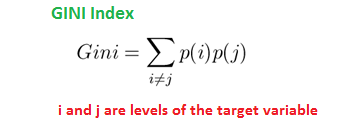

A Gini index is used in decision trees. A single decision in a decision tree is called a node, and the Gini index is a way to measure how "impure" a single node is. 





In [31]:
import pandas as pd

In [32]:
df = pd.read_csv("salaries.csv")                
#load dataset
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


### Company, job,degree are independent variable whereas, salary is target value.


In [33]:
inputs = df.drop('salary_more_then_100k',axis='columns') 

#independent variable dataframe input and will drop the target column which is salary

In [34]:
target = df['salary_more_then_100k']
# target value 

### We know that machine learning algorthim can work on number but it can not work on labels, so now we will convert 3 columns (Company, job,degree) number which is by label encoder.

In [35]:
from sklearn.preprocessing import LabelEncoder
#Import labelEncoder library
#we will create three objects 
    
le_company = LabelEncoder() 
le_job = LabelEncoder()
le_degree = LabelEncoder()

### In input data frame we will create one more column we call fit and transform method on company column.

In [36]:
inputs['company_n'] = le_company.fit_transform(inputs['company']) 
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])

In [37]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


### Output: Here we have labelled column into numbers 

### Now, drop all label columns (Company, job,degree) and all you will have is numbers

In [38]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [39]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


### Now see,
   
Company:
- google is encoded as number 2,
- facebook as 1
- ABC pharma as 0

Job tittle :
- sales executive as 2
- computer programmer as 1
- business manager as 0

Degree:
- Masters as 1
- Bachelors as 0

In [12]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

### We will train our classifiers,for decision tree we import "tree" from sklearn library

In [18]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

### Train the model, call fit here and add input and target value.
- In output criterion='gini' you can also use 'entropy'

In [20]:
model.fit(inputs_n, target) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Here, my model is ready and ready to predict for score we supply input and target variable.
- Score is 1 because we use the same dataset as we used in training .In real life if your dataset is complex score will be less then 1

In [21]:
model.score(inputs_n,target)

1.0

**Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?**

In [22]:
model.predict([[2,1,0]])

array([0])

**Is salary of Google, Computer Engineer, Masters degree > 100 k ?**

In [23]:
model.predict([[2,1,1]])

array([1])